# **Exercise Optimization Acshayan Srimohan - 100896568**
## *An Analysis on the Optimal Exercise Routine* 

With the new year approaching quickly, many people may feel more motivated to embark on a journey of self betterment. For some, this may included going to the gym, and trying to stay consistent. However, this could prove to be a challenge to stick to for the next 365 days, especially if you are unsure about what your preferred method of training is to reach your goal. This assignment's purpose is to find, statistically, what he most optimal method of training is to lose weight and reach your goal physique in the new year.

## Data Collection
The data was retrieved from the open-source database known as *Kaggle*, and contains a wide range of information regarding people's body information along with their workout preferences and results.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading Data

df = pd.read_csv('gym_members_exercise_tracking.csv',names=['Age','Gender','Weight','Height','Max_BPM','Avg_BPM','Resting_BPM','Session_Duration','Calories_Burned','Workout_Type','Fat_Percentage','Water_Intake','Workout_Frequency','Experience_Level','BMI'])


## Cleaning Data

I started the data cleaning process by checking a described view of the data set in order to look for any gaps in the data

In [26]:
df.describe()

,Age,Gender,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake,Workout_Frequency,Experience_Level,BMI
count,974,974,974,974,974,974,974,974,974,974,974,974,974,974,974
unique,43,3,533,52,41,51,26,148,622,5,240,24,5,4,772
top,43,Male,75.6,1.62,198,132,50,1.37,883.0,Strength,28.1,3.5,3,2,23.53
freq,34,511,6,44,34,27,59,20,6,258,14,124,368,406,5


Although there were not any gaps in the set, there were other issues that were to be dealt with. Firstly, the first row was reading as a part of the data set which was figured out because of the unique gender section read 3 instead of 2 (this dataset only accounts for Male and Female). There were also lot of columns that I was simply not interested in for the sake of this analysis, as we are solely focused on calories burnt and simple factors. Another issue in the set was that, although a numerical values, some of the columns I was interested in were reading as a String object. Finally, I ensured that all values would round to 2 decimal places at max, and changed the remaining column names to be less awkward.

In [27]:
#Dropping unused rows/columns
df = df.drop(0)
df= df.drop(columns=['Weight','Height','Max_BPM','Avg_BPM','Resting_BPM','Fat_Percentage','Water_Intake','Experience_Level','BMI'])

#Fixing format
df['Age'] = pd.to_numeric(df['Age'])
df['Session_Duration'] = pd.to_numeric(df['Session_Duration'])
df['Workout_Frequency'] = pd.to_numeric(df['Workout_Frequency'])
df['Calories_Burned'] = pd.to_numeric(df['Calories_Burned'])

pd.set_option('display.precision',2)
#Fixing column names
df.columns=['Age','Gender','Session Duration','Calories Burned','Workout Type','Workout Frequency']

Before getting into the analysis, there were 2 columns I wanted to add. First, I added a calorie burn rate column, which was to find the average amount of calories burned per hour for each person.
I also added an age group column in order to check how different exercise routines work for different age groups.

In [28]:

#Adding new Columns
df['Calorie Burn Rate']=df['Calories Burned']/(df['Workout Frequency']*df['Session Duration'])

df['Age Group'] = pd.cut(df['Age'],bins=[18,27,37,47,59],labels =['18-27','28-37','38-47','48-59'],right =True)


## Analyses
### Distributions
We will start by looking at the distributions of the collected data

Below, we see that the most popular workout routine happens to be strength training, with cardio being a really close second. HIIT training proves to be the least popular out of the 4 routine types, but not by a large margin making this data spread a relatively fair comparison.

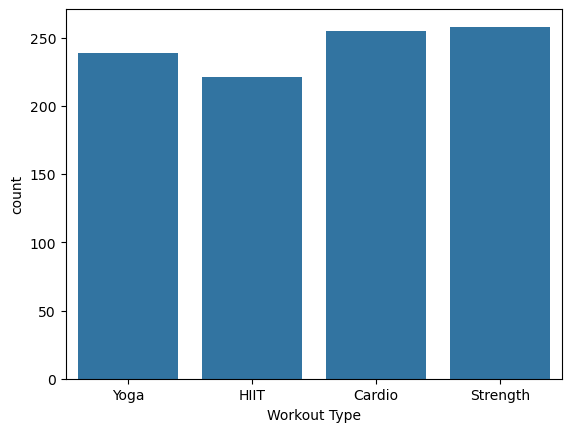

In [29]:
c=sns.countplot(x=df['Workout Type'])

Next, we have the distribution of ages in this set. This is where it gets pretty interesting, as the shape that is made vaguely resembles a reverse bell curve of sorts, with the highest number of people being on lower range of age. This is to be expected, as younger people tend to be more energetic and motivated getting into it, and as people get older they tend to be more driven for health related factors, leaving to a middle ground being a dip.

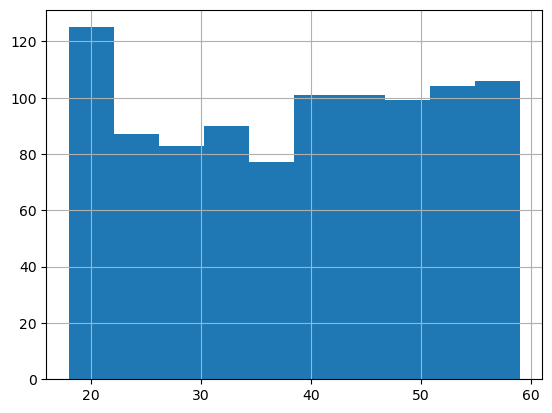

In [30]:
h=df.Age.hist(bins=10,grid=True)

The distribution of gender in this data set is pretty even, with men outnumbering women very slightly.

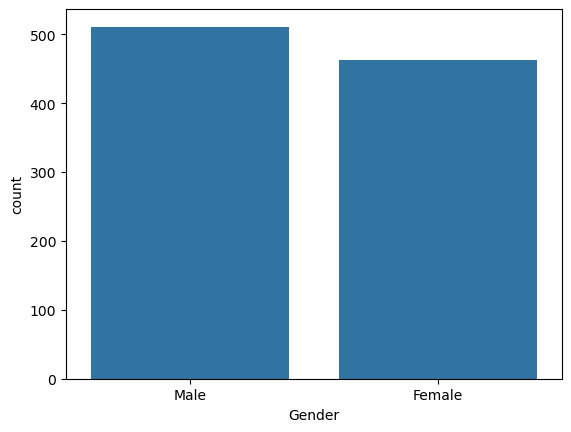

In [31]:
c=sns.countplot(x=df['Gender'])

In [32]:
Calorie_Info = df.groupby(['Gender','Workout Type'])['Calorie Burn Rate'].mean().reset_index()

Age_Info = df.groupby(['Age Group','Workout Type'])['Calorie Burn Rate'].mean().reset_index()



/var/folders/7r/dng_qd3s2zx7prggwckyq5tr0000gn/T/ipykernel_91555/2730260856.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Age_Info = df.groupby(['Age Group','Workout Type'])['Calorie Burn Rate'].mean().reset_index()


### Gender's role in Exercise Effectiveness
Below, we see the relationship between exercise routines and the rate that calories are burned seperated by gender. 

In [33]:
display(Calorie_Info)

,Gender,Workout Type,Calorie Burn Rate
0,Female,Cardio,233.86
1,Female,HIIT,221.04
2,Female,Strength,221.19
3,Female,Yoga,208.87
4,Male,Cardio,253.74
5,Male,HIIT,242.08
6,Male,Strength,243.72
7,Male,Yoga,252.68


We can see that there is not a significant difference in the rate calories are burnt in respect to routine due to gender. It is noteworthy that this chart indicates that men tend to have an easier time burning calories regardless of routine. Another noteworthy point is that, although the difference between men and women calorie burn rate remain around the same through most of the routines (around 20 calorie per hour disparity), the difference in yoga's effect is quite an amount larger (a difference of 43.81 calories per hour), suggesting that, for yoga, men benefit a good amount more in comparison to women.

Below, we have a graph visualization of this chart.

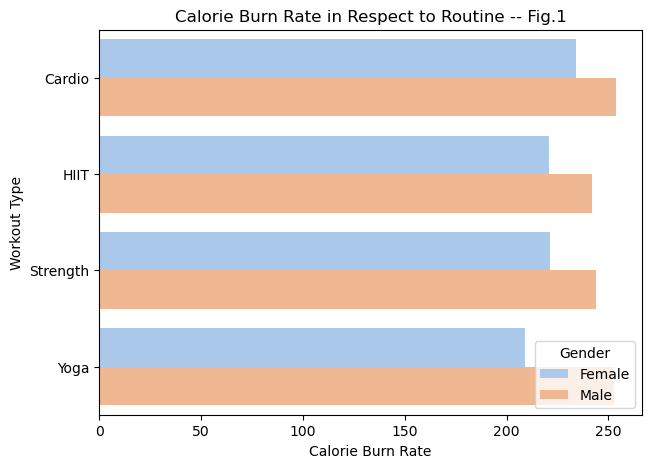

In [34]:
fig,ax = plt.subplots(figsize=(7,5))

sns.barplot(x='Calorie Burn Rate',y='Workout Type',hue = 'Gender',data = Calorie_Info,palette = 'pastel', ax=ax).set(xlabel="Calorie Burn Rate",ylabel="Workout Type",title="Calorie Burn Rate in Respect to Routine -- Fig.1")

plt.show()

### Age's role in Exercise Effectiveness
This chart shows the relationship between age and the rate that calories are burned.

In [35]:
display(Age_Info)

,Age Group,Workout Type,Calorie Burn Rate
0,18-27,Cardio,250.91
1,18-27,HIIT,248.30
2,18-27,Strength,247.42
3,18-27,Yoga,258.02
4,28-37,Cardio,249.18
5,28-37,HIIT,240.50
6,28-37,Strength,228.97
7,28-37,Yoga,240.83
8,38-47,Cardio,236.85
9,38-47,HIIT,220.05


This chart shows that cardio tends to be the most effective *overall*, however this is not the tell all be all. Among younger individuals, yoga seems to be the most effective, however its effectiveness has a steady decline as indivduals get older. Another interesting thing to point out is strength training being the most effective when it comes to 38-47 year olds.

Below we have a visualization for this data

<function matplotlib.pyplot.show(close=None, block=None)>

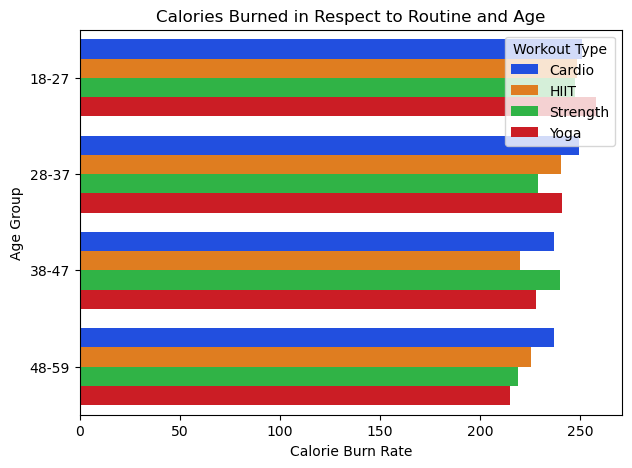

In [36]:
fig,ax = plt.subplots(figsize=(7,5))
sns.barplot(x='Calorie Burn Rate',y='Age Group',hue = 'Workout Type',data = Age_Info,palette = 'bright', ax=ax).set(xlabel="Calorie Burn Rate",ylabel="Age Group",title="Calories Burned in Respect to Routine and Age")
plt.show

## Discussion

This analysis was originally done to explore which exercise routine would be the most effective for fat loss, an although there is an answer that was an answer that was observed, there were some surprising results that should also be taken into consideration when figuring out your new workout routine. Cardio is definitely the most consistent throughout all our observation and it is safe to say that it is overall the most effective, however the margins in which it was "better" were not large by any means. 
We learned that gender does not play a significant role when it comes to burning calories in exception to yoga, which is something more young men should be keeping their eye on implementing into their routine. However, as you age, strength, HIIT, and cardio training start to become more beneficial in comparison.

All in all, this analysis shows that no one should neglect cardio, however all routines prove to give solid results in their own right, and the most important part about meeting your new year's resolution is consistency! It is also important to know that although this analysis looks solely at calorie burning, all routines have their own side benefits (cardio and HIIT with cardiovascular health, strength with muscle growth, yoga with flexbility), so it is important to see how these benefits also fit into your goals. Being open to trying all different routines, and implementing aspects from each into your own personalized routine is important to getting the results you want as well as enjoying the process enough to stick to it.

## Resources Used
 1. Source Data - "https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset"
 2. Pandas for Data Manipulation
 3. Seaborn for Data Visualization
 4. Matplotlib for Data Visualization